#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [3]:
import sys
import numpy as np
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [4]:
x = 2**52
spacing = 2**(52+1-53)
print(spacing)
# altro modo per calcolare lo spacing
print(np.spacing(2**52))
y = x + spacing
z = x + 0.5
q = y + 0.5
print("y =", y)
print("x = ",x)
# vediamo che non c'è troppa differenza nel numero perchè l'ho sommato a qualcosa minore dello spacing
print("z = ",z)
print("q = ",q)

val_suc = x+spacing
print(val_suc)

1
1.0
y = 4503599627370497
x =  4503599627370496
z =  4503599627370496.0
q =  4503599627370498.0
4503599627370497


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [1]:
B = 2
t = 53
min_exp = -1022
max_exp = 1023
num_F = 2*(B-1)*B**(t-1)*(max_exp-min_exp+1)+1
print(num_F)

18428729675200069633


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [18]:
esp = 2**-52
a = 1
b = 2
print(a+esp)

1.0000000000000002


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [26]:
arr = [0.1 for x in range(10)]
sum = 0
for elem in arr:
    sum += elem
print("Fatto con il for: ",sum)
print("Fatto con numpy:",np.sum(arr))
# Osservo che facendolo con il for sia come ris 0,9 periodico
# mentre, con la funzione sia come ris 1

Fatto con il for:  0.9999999999999999
Fatto con numpy: 1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [34]:
a=1.234567890123400e+15
b=-1.234567890123401e+15
c=0.06
print("(a + b) + c = ", (a + b) + c)
print("(a + c) + b = ", (a + c) + b)
print("a + ( b + c ) = ", a + ( b + c ) )


a=0.23371258e-4
b=0.33678429e+2 
c=-0.33677911e+2
print("(a + b) + c = ", (a + b) + c)
print("(a + c) + b = ", (a + c) + b)
print("a + ( b + c ) = ", a + ( b + c ) )


(a + b) + c =  -0.94
(a + c) + b =  -1.0
a + ( b + c ) =  -1.0
(a + b) + c =  0.0005413712580022434
(a + c) + b =  0.0005413712580022434
a + ( b + c ) =  0.0005413712579995743


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [41]:
x = 7777
y1 = np.sqrt((x**2) + 1) - x
y2 = 1 / (np.sqrt((x**2) + 1) + x)
print(y1)
print(y2)

x = 77777777
y1 = np.sqrt((x**2) + 1) - x
y2 = 1 / (np.sqrt(x**(2) + 1) + x)
#print(np.sqrt(4))
print(y1)
print(y2)

6.429214317904552e-05
6.429214323431402e-05
0.0
6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

[5.00000000e-01 9.09090909e-03 9.90099010e-05 9.99000999e-07
 9.99900010e-09 9.99990000e-11 9.99999000e-13 9.99999899e-15
 1.00000000e-16 1.00000015e-18 1.00000061e-20 9.99999968e-23
 1.00004844e-24 1.00090672e-26 9.93964741e-29 9.86076132e-31
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
[0.5, 0.009090909090909094, 9.90099009900991e-05, 9.990009990010207e-07, 9.999000099989363e-09, 9.99990000100624e-11, 9.999989998934512e-13, 9.999998990718643e-15, 1.0000000003187713e-16, 1.0000001492112815e-18, 1.0000006145003761e-20, 9.999999682655225e-23, 1.0000484358795393e-24, 1.0009067165444198e-26, 9.939647405784749e-29, 9.860761315262648e-31, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.00909090909090909, 9.900990099009902e-05, 9.99000999000999e-07, 9.999000099990002e-09, 9.99990000099999e-11, 9.99999000001e-13, 9.99999900000

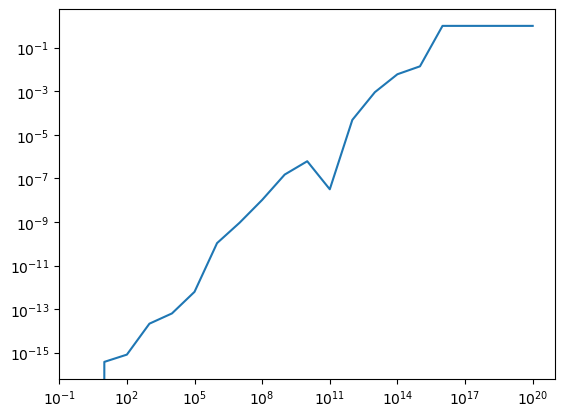

In [8]:
import matplotlib.pyplot as plt
# importa a biblioteca matplotlib
# d'ora in poi si potrà usare plt invece di scrivere matplotlib.pyplot
import math

A = lambda x: (1/x) - (1/(x+1))
B = lambda x: 1/(x*(x+1))
def funcA(x):
    return (1/x) - (1/(x+1))

def funcB(x):
    return 1/(x*(x+1))

x = 10.0**np.arange(21)
# ricorda cambia molto usare il float rispetto all'int
#print(x)

# a elementi funzione con ris non esatti
prova = A(x)
print(prova)
a = []
# b elementi funzione con ris esatti
b = []
prova2 = B(x)

for elem in x:
    a.append(funcA(elem))
    b.append(funcB(elem))

# y errore relativo
y = [np.abs(b[i]-a[i])/np.abs(b[i]) for i in range(21)]

print(x)
print(a)
print(b)
print(y)


plt.loglog(x,y)

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo alternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

In [29]:
# lambda k,x: x**2 + 10**k*x + 1 = 0
k = [x for x in range(1,9+1)]
x1ver = 10**-k
a = 1
b = [10**esp for esp in k]
#print(b)
c = 1

def risequaz(a,b,c):
    Delta = lambda a,b,c : (b**2)-(4*a*c)
    x1 = (-b+np.sqrt(Delta(a,b,c)))/2
    x2 = (-b-np.sqrt(Delta(a,b,c)))/2
    return x1 , x2

for elemB in b:
    sol1 ,  sol2 = risequaz(a, elemB, c)
    print("per b = ", elemB)
    print("sol x1 = ",sol1)
    print("sol x2 = ",sol2)
    print("\n")



per b =  10
sol x1 =  -0.10102051443364424
sol x2 =  -9.898979485566356


per b =  100
sol x1 =  -0.010001000200048793
sol x2 =  -99.98999899979995


per b =  1000
sol x1 =  -0.0010000010000226212
sol x2 =  -999.998999999


per b =  10000
sol x1 =  -0.00010000000111176632
sol x2 =  -9999.999899999999


per b =  100000
sol x1 =  -1.0000003385357559e-05
sol x2 =  -99999.99999


per b =  1000000
sol x1 =  -1.00000761449337e-06
sol x2 =  -999999.999999


per b =  10000000
sol x1 =  -9.96515154838562e-08
sol x2 =  -9999999.9999999


per b =  100000000
sol x1 =  -7.450580596923828e-09
sol x2 =  -100000000.0


per b =  1000000000
sol x1 =  0.0
sol x2 =  -1000000000.0




- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

valore esatto =  2.718281828459045
valori provenienti dalla formula =  [2.0, 2.5937424601000023, 2.7048138294215285, 2.7169239322355936, 2.7181459268249255, 2.7182682371922975, 2.7182804690957534, 2.7182816941320818, 2.7182817983473577, 2.7182820520115603, 2.7182820532347876, 2.71828205335711, 2.7185234960372378, 2.716110034086901, 2.716110034087023, 3.035035206549262, 1.0]


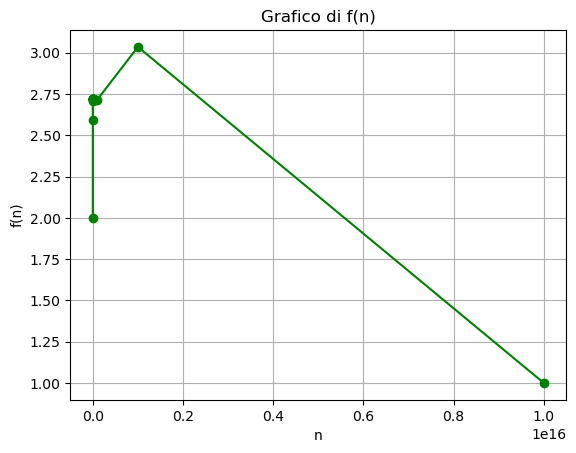

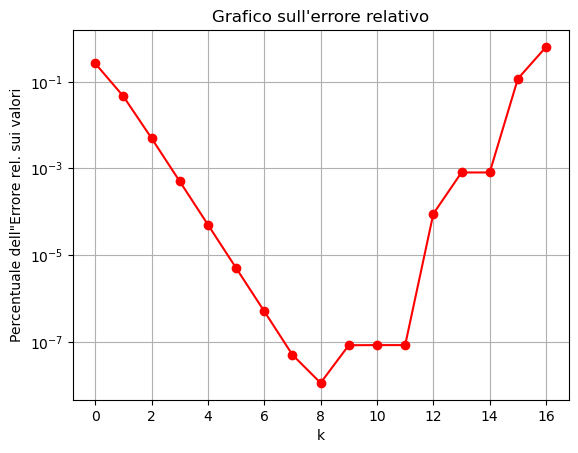

In [13]:
import matplotlib.pyplot as plt
# importa a biblioteca matplotlib
# d'ora in poi si potrà usare plt invece di scrivere matplotlib.pyplot
import math
import numpy as np

f = lambda n: (1/n+1)**n

k = [x for x in range(16+1)]
n = [10**elem for elem in k]
fn = [f(elem) for elem in n]
val_es = math.exp(1)
err_rel = [np.abs((val_es-elem)/(val_es)) for elem in fn]
print("valore esatto = ", val_es)
print("valori provenienti dalla formula = ", fn)

# Creazione grafico
#plt.subplot(2,1,1)
plt.plot(n, fn, 'g-o')
plt.grid(True)
plt.xlabel('n')
# xlabel assegna un'etichetta all'asse delle ascisse
plt.ylabel('f(n)')
plt.title("Grafico di f(n)")
plt.show()


# Creazione secondo grafico
#plt.subplot(2,1,2)
plt.plot(k, err_rel, 'r-o')
plt.yscale('log')
plt.grid(True)
plt.xlabel('k')
# xlabel assegna un'etichetta all'asse delle ascisse
plt.ylabel('Percentuale dell"Errore rel. sui valori')
plt.title("Grafico sull'errore relativo")
plt.savefig("filename2.png")
plt.show()
